In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qutip

x = np.array([[1, 2, 3, 4, 5]])
r = np.random.rand(4, 4)
print(qutip.Qobj(r))

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.12265181 0.55859581 0.79249963 0.74450125]
 [0.94128531 0.7899213  0.89687633 0.91604175]
 [0.8370406  0.44886818 0.94726911 0.7511959 ]
 [0.86798017 0.71779379 0.87965932 0.81698859]]


(<Figure size 640x480 with 2 Axes>, <Axes: >)

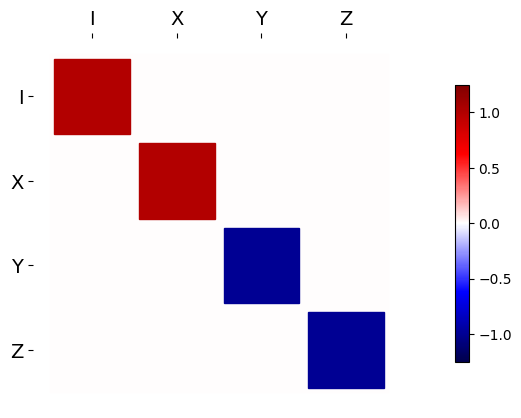

In [5]:
import matplotlib.pyplot as plt
from qutip import *
settings.colorblind_safe = True

plt.rcParams['savefig.transparent'] = True

X = sigmax()
S = spre(X)*spost(X.dag())

hinton(S)

In [6]:
# times = np.linspace(0.0, 10.0, 200)
# psi0 = tensor(fock(2, 0), fock(10, 8))
# a = tensor(qeye(2), destroy(10))
# sm = tensor(destroy(2), qeye(10))
# H = 2*np.pi*a.dag()*a+2*np.pi*sm.dag()*sm+2*np.pi*0.25*(sm*a.dag()+sm.dag()*a)
# data = mcsolve(H, psi0, times, [np.sqrt(0.1)*a],
#                e_ops=[a.dag()*a, sm.dag()*sm])
#
# plt.figure()
# plt.plot(times, data.expect[0], times, data.expect[1])
# plt.plot('Monte Carlo time evolution')
# plt.xlabel('Time')
# plt.ylabel('Expectation values')
# plt.legend(("cavity photon number", "atom excitation probablity"))
# plt.show()

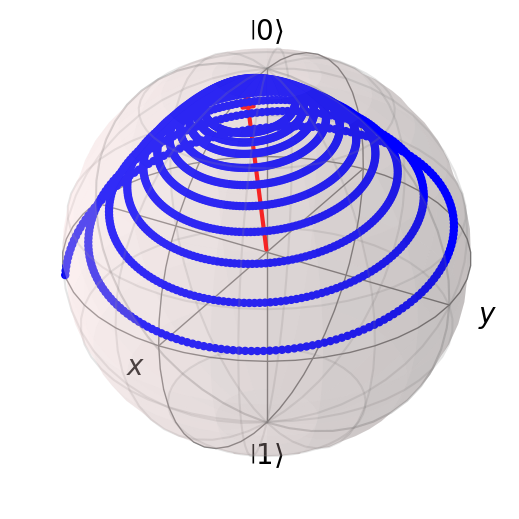

In [ ]:
delta = 0.2 * 2 * np.pi
eps0 = 1.0 * 2 * np.pi
gamma1 = 0.5

H = -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz()


def ohmic_spectrum(w):
    if w == 0.0:  # 移相诱导噪声
        return gamma1
    else:  # 松弛诱导噪声
        return gamma1 / 2 * (w / (2 * np.pi)) * (w > 0.0)


R = bloch_redfield_tensor(H, [[sigmax(), ohmic_spectrum]], fock_basis=True)

tlist = np.linspace(0, 15.0, 1000)
psi0 = rand_ket(2, seed=1)
e_ops = [sigmax(), sigmay(), sigmaz()]
expt_list = mesolve(R, psi0, tlist, e_ops=e_ops).expect
sphere = Bloch()
sphere.vector_color = ['r']
sphere.add_points([expt_list[0], expt_list[1], expt_list[2]])
sphere.add_vectors(np.array([delta, 0, eps0]) /
                   np.sqrt(delta ** 2 + eps0 ** 2))
sphere.make_sphere()
sphere.show()

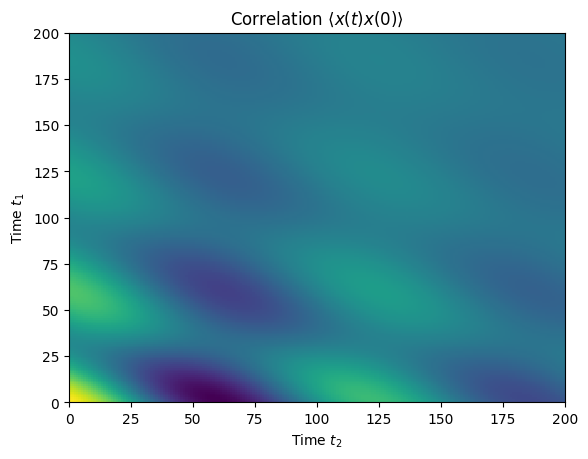

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
times = np.linspace(0, 10.0, 200)
a = qutip.destroy(10)
x = a.dag() + a
H = a.dag() * a
alpha = 2.5
rho0 = qutip.coherent_dm(10, alpha)
corr = qutip.correlation_2op_2t(
    H, rho0, times, times, [np.sqrt(0.25) * a], x, x)
plt.pcolor(np.real(corr))
plt.xlabel(r'Time $t_2$')
plt.ylabel(r'Time $t_1$')
plt.title(r'Correlation $\left<x(t)x(0)\right>$')
plt.show()